In [1]:
# matlotlib inline plotting
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from six.moves import cPickle as pickle
from scipy import ndimage
from PIL import Image

from collections import Counter

from utils import maybe_download as maybe_download
from utils import maybe_extract as maybe_extract
from utils import load_data as load_data
from utils import maybe_pickle as maybe_pickle
from utils import load_images as load_images

# Fetch and Extract Data

In [3]:
url = 'http://ufldl.stanford.edu/housenumbers/'

trainFilename = 'train.tar.gz'
testFilename = 'test.tar.gz'
extraFilename = 'extra.tar.gz'

In [4]:
maybe_download(url, trainFilename, 404141560)
maybe_download(url, testFilename, 276555967)
maybe_download(url, extraFilename, 1955489752)

maybe_download(url, 'train_32x32.mat', 182040794)
maybe_download(url, 'test_32x32.mat', 64275384)
maybe_download(url, 'extra_32x32.mat', 1329278602)

Found and verified train.tar.gz
Found and verified test.tar.gz
Found and verified extra.tar.gz
Found and verified train_32x32.mat
Found and verified test_32x32.mat
Found and verified extra_32x32.mat


'extra_32x32.mat'

In [5]:
trainStruct = maybe_extract(trainFilename)
testStruct = maybe_extract(testFilename)
extraStruct = maybe_extract(extraFilename)

train already present - Skipping extraction of train.tar.gz.
test already present - Skipping extraction of test.tar.gz.
extra already present - Skipping extraction of extra.tar.gz.


# Explore/Visualize Data

In [6]:
trainTuple = load_data('train/digitStruct.mat')
testTuple = load_data('test/digitStruct.mat')
extraTuple = load_data('extra/digitStruct.mat')

0 elapsed
5000 elapsed
10000 elapsed
15000 elapsed
20000 elapsed
25000 elapsed
30000 elapsed
0 elapsed
5000 elapsed
10000 elapsed
0 elapsed
5000 elapsed
10000 elapsed
15000 elapsed
20000 elapsed
25000 elapsed
30000 elapsed
35000 elapsed
40000 elapsed
45000 elapsed
50000 elapsed
55000 elapsed
60000 elapsed
65000 elapsed
70000 elapsed
75000 elapsed
80000 elapsed
85000 elapsed
90000 elapsed
95000 elapsed
100000 elapsed
105000 elapsed
110000 elapsed
115000 elapsed
120000 elapsed
125000 elapsed
130000 elapsed
135000 elapsed
140000 elapsed
145000 elapsed
150000 elapsed
155000 elapsed
160000 elapsed
165000 elapsed
170000 elapsed
175000 elapsed
180000 elapsed
185000 elapsed
190000 elapsed
195000 elapsed
200000 elapsed


In [7]:
extraTuple[0][[1,2,3,4]].shape

(4, 6)

In [8]:
trainTuple[0][[1,2,3,4]].shape

(4, 6)

In [9]:
testTuple[0][[1,2,3,4]].shape

(4, 6)

#### saving dataset 

In [10]:
maybe_pickle('dataset', trainTuple, testTuple, extraTuple)

dataset already present - Skipping pickling.


'dataset.pickle'

#### load dataset

In [11]:
try:
    with open('dataset.pickle', 'rb') as f:
            dataset = pickle.load(f)
        
except Exception as e:
    print('Unable to process data (dataset.pickle)', ':', e)
    raise

#### data exploration

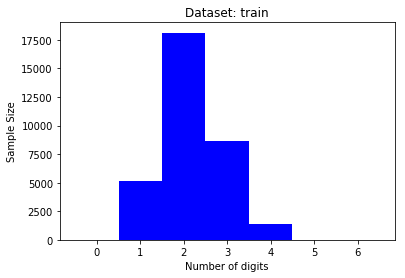

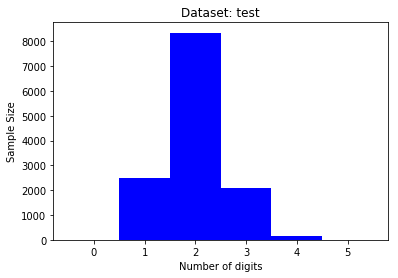

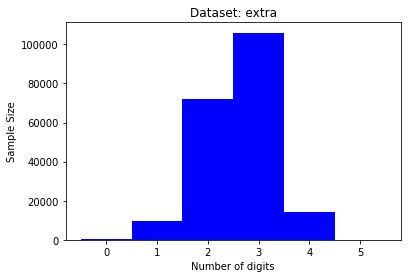

In [24]:
for data in ('train', 'test', 'extra'):
    c = Counter(np.sum(dataset[data]["tops"] > 0, axis =1))
    l = plt.bar(list(c.keys()), list(c.values()), 1, color="blue")

    plt.xlabel('Number of digits')
    plt.ylabel('Sample Size')
    plt.title('Dataset: ' + data)

    plt.show()

In [73]:
arr = dataset['test']["heights"]
arr = list(map(lambda x: [e for e in x if e > 0], arr))

flatten = lambda l: [item for sublist in arr for item in sublist]

print(np.mean(flatten(arr)))
print(np.std(flatten(arr)))
print(np.median(flatten(arr)))


27.9619698832
13.4604869604
24.0


In [72]:
arr = dataset['train']["heights"]
arr = list(map(lambda x: [e for e in x if e > 0], arr))

flatten = lambda l: [item for sublist in arr for item in sublist]

print(np.mean(flatten(arr)))
print(np.std(flatten(arr)))
print(np.median(flatten(arr)))



33.861310182
18.6011665705
29.0


In [74]:
arr = dataset['extra']["heights"]
arr = list(map(lambda x: [e for e in x if e > 0], arr))

flatten = lambda l: [item for sublist in arr for item in sublist]

print(np.mean(flatten(arr)))
print(np.std(flatten(arr)))
print(np.median(flatten(arr)))

38.2043356535
18.2537515443
34.0


# Data Preparation

In [17]:
trainX = load_images(dataset, 'train')
testX = load_images(dataset, 'test')
validationX = load_images(dataset, 'valid')
extraX = load_images(dataset, 'extra')

0 elapsed out of  33402 for:  train
5000 elapsed out of  33402 for:  train
10000 elapsed out of  33402 for:  train
15000 elapsed out of  33402 for:  train
20000 elapsed out of  33402 for:  train
25000 elapsed out of  33402 for:  train
30000 elapsed out of  33402 for:  train
0 elapsed out of  13068 for:  test
5000 elapsed out of  13068 for:  test
10000 elapsed out of  13068 for:  test
0 elapsed out of  2000 for:  valid
0 elapsed out of  202353 for:  extra
5000 elapsed out of  202353 for:  extra
10000 elapsed out of  202353 for:  extra
15000 elapsed out of  202353 for:  extra
20000 elapsed out of  202353 for:  extra
25000 elapsed out of  202353 for:  extra
30000 elapsed out of  202353 for:  extra
35000 elapsed out of  202353 for:  extra
40000 elapsed out of  202353 for:  extra
45000 elapsed out of  202353 for:  extra
50000 elapsed out of  202353 for:  extra
55000 elapsed out of  202353 for:  extra
60000 elapsed out of  202353 for:  extra
65000 elapsed out of  202353 for:  extra
70000 ela

In [18]:
trainY = dataset['train']['labels']
testY = dataset['test']['labels']
validationY = dataset['valid']['labels']
extraY = dataset['extra']['labels']

In [22]:
try:
    with open( 'tensorflow_training_data.pickle', 'wb') as f:
        pickle.dump({
            'train': {'data': trainX, 'label': trainY},
            'test': {'data': testX, 'label': testY},
            'valid': {'data': validationX, 'label': validationY},
        }, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to',  'tensorflow_training_data.pickle', ':', e)

#### Using extra as what needs to be predicted, after training. Note that for the webservice, label is not needed.

In [31]:
try:
    with open( 'tensorflow_predict_data.pickle', 'wb') as f:
        pickle.dump({'toPredict': {'data': extraX, 'label': extraY}}, f, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to',  'tensorflow_predict_data.pickle', ':', e)            

#### Visualize pickle, double check all is in order

In [34]:
try:
    with open('tensorflow_predict_data.pickle', 'rb') as f:
        dataset = pickle.load(f)
        imDataset = dataset['toPredict']['data'].reshape(-1, 32, 32, 1)
        imlabels = dataset['toPredict']['label']

except Exception as e:
    print('Unable to load data to',  'tensorflow_predict_data.pickle' + '.pickle', ':', e)
    raise

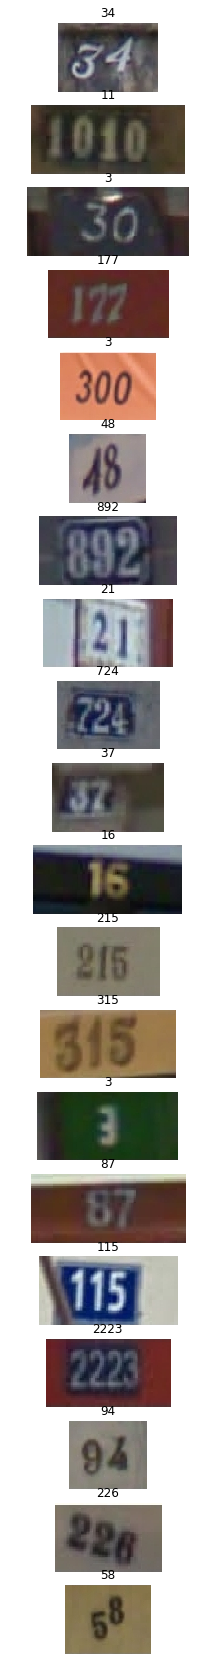

In [35]:
plt.rcParams['figure.figsize'] = (30.0, 30.0)

nImages = 20

f, ax = plt.subplots(nrows=nImages, ncols=1)

imSamples = []
    
for i, j in enumerate(np.sort(np.random.randint(0, imlabels.shape[0], size=nImages))):
    
    filename = str(j + 1) + '.png' #files are offset by 1.
    fullname = os.path.join('extra', filename)
    
    im = Image.open(fullname)
    
    house_num = ''
    digits = imlabels[j][imlabels[j] < 10].astype(int) #10 is blank; no number. 
    for k in digits:
        house_num += str(k)
    
    imSamples.extend([j])
    
    ax[i].axis('off')
    ax[i].set_title(house_num, loc='center')
    ax[i].imshow(im)

array([[ True, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False,  True, False, False, False],
       ..., 
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False,  True, False, False, False]], dtype=bool)